<a href="https://colab.research.google.com/github/ssoh0102/ConsoleApplication2/blob/master/BinarySearchTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이진 검색 트리



## 노드 정의

트리 노드를 정의하자.

노드의 변수는 3개이다.
키(key)와 좌측(left), 우측(right) 자식 노드가 있다.

![TreeNode.png](https://drive.google.com/uc?id=1J5basnNe7_CKJl9EbFt_akVvDngGvaPJ)

이를 위해 TreeNode 클래스를 정의하고 변수 3개를 정의한다.

In [ ]:
class TreeNode:
	def __init__(self, key, left, right):
		self.key = key
		self.left = left
		self.right = right

TreeNode a와 b가 있다고 할 때

```python
TreeNode a(5, None, None)
TreeNode b(3, None, None)
```

여기에서 a.left에 b 를 넣는 것은 b 를 a의 좌측 자식 노드로 넣는 것과 같다.

```python
a.left = b
```

이것은 다음 그림과 같다.

![TreeNode_2.png](https://drive.google.com/uc?id=1ffihjpWMYMIzKhT8mWbIdZz_-aan95bU)




## 그래프 그리기 코드
우리가 생성한 그래프가 어떤 형태인지 확인하는 코드입니다.

테스트 코드에서
```
NameError: name 'renderBST' is not defined
```
와 같은 에러가 난다면 아래 코드를 실행하세요.

In [73]:
from graphviz import Digraph

def addNode(g:Digraph, n:TreeNode):
    if n != None:
        g.node(str(n.key))
        addNode(g, n.left)
        addNode(g, n.right)

def addEdge(g:Digraph, n:TreeNode):
    if n.left != None:
        g.edge(str(n.key), str(n.left.key))
        addEdge(g, n.left)
    if n.right != None:
        g.edge(str(n.key), str(n.right.key))
        addEdge(g, n.right)


def renderBST(bst):
  g = Digraph('BST')

  root = bst.getRoot()

  addNode(g, root)
  addEdge(g, root)

  g.render('BST_render', view=True)
  return g

## Binary Search Tree
### 삽입(insert)

삽입의 의사 코드는 다음과 같다.

![image-2.png](https://drive.google.com/uc?id=1h1WGI95T2m7NRobfegXUuNtqaXj0RdMG)

위 코드를 참고하여 아래 BinarySearchTree 함수 (__insertNode) 을 완성해보자.

완성 이후 아래 삽입 테스트 코드를 통해 결과를 확인해보자.


### 검색(Search)

검색에 대한 의사 코드는 다음과 같다.

![image.png](https://drive.google.com/uc?id=1XPufNs1qkOoRn_sP1hBndpUz1uXqBBN7)

위 코드를 참고하여 아래 BinarySearchTree 함수 (__searchNode) 을 완성해보자.


### 삭제(Delete)

검색에 대한 의사 코드는 다음과 같다.

![image-3.png](https://drive.google.com/uc?id=1xhXMrDLhKtZNBQEIhErrPyeYx03sL6mC)

위 코드를 참고하여 아래 BinarySearchTree 함수 (__deleteNode 와 __treeDelete) 을 완성해보자.






In [74]:
from graphviz import Digraph

def addNode(g:Digraph, n:TreeNode):
    if n != None:
        g.node(str(n.key))
        addNode(g, n.left)
        addNode(g, n.right)

def addEdge(g:Digraph, n:TreeNode):
    if n.left != None:
        g.edge(str(n.key), str(n.left.key))
        addEdge(g, n.left)
    if n.right != None:
        g.edge(str(n.key), str(n.right.key))
        addEdge(g, n.right)


def renderBST(bst):
  g = Digraph('BST')

  root = bst.getRoot()

  addNode(g, root)
  addEdge(g, root)

  g.render('BST_render', view=True)
  return g

class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self._root = None

    # 삽입
    def insert(self, keyItem):
        self._root = self.__insertNode(self._root, keyItem)

    def __insertNode(self, tNode: TreeNode, keyItem) -> TreeNode:
        if tNode is None:
            return TreeNode(keyItem)
        if keyItem < tNode.key:
            tNode.left = self.__insertNode(tNode.left, keyItem)
        elif keyItem > tNode.key:
            tNode.right = self.__insertNode(tNode.right, keyItem)
        return tNode

    # 트리 렌더링
    def render(self):
        def _render(node, level, pos):
            if node is not None:
                output[level][pos] = str(node.key)
                _render(node.left, level + 1, pos - (2 ** (height - level - 1)), output)
                _render(node.right, level + 1, pos + (2 ** (height - level - 1)), output)

        height = self.getHeight(self._root)
        width = 2 ** height - 1
        output = [[" " for _ in range(width)] for _ in range(height)]

        _render(self._root, 0, (width // 2), output)

        for line in output:
            print("".join(line).rstrip())

    def getHeight(self, node: TreeNode):
        if node is None:
            return 0
        return 1 + max(self.getHeight(node.left), self.getHeight(node.right))
    def getRoot(self):
        return self._root

    # Clear method to reset the tree
    def clear(self):
        self._root = None

# 렌더링 함수
def renderBST(bst: BinarySearchTree):
    bst.render()



## 테스트 코드

### 삽입

몇 개의 키를 삽입하여 트리가 다음 그림과 같이 생성되었는지 확인해보자.

![image.png](https://drive.google.com/uc?id=1RLxP-SZCMMeYys9q34CPuR4-6yGHCI9u)

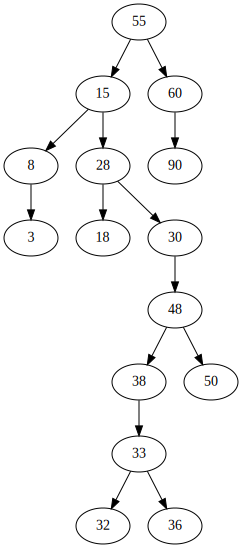

In [80]:
from graphviz import Digraph

def addNode(g:Digraph, n:TreeNode):
    if n != None:
        g.node(str(n.key))
        addNode(g, n.left)
        addNode(g, n.right)

def addEdge(g:Digraph, n:TreeNode):
    if n.left != None:
        g.edge(str(n.key), str(n.left.key))
        addEdge(g, n.left)
    if n.right != None:
        g.edge(str(n.key), str(n.right.key))
        addEdge(g, n.right)


def renderBST(bst):
  g = Digraph('BST')

  # The getRoot method was missing from the BinarySearchTree class
  # This line now accesses the _root attribute directly
  root = bst._root

  addNode(g, root)
  addEdge(g, root)

  g.render('BST_render', view=True)
  return g

bst1 = BinarySearchTree()
bst1.clear()

bst1.insert(55)
bst1.insert(60)
bst1.insert(90)
bst1.insert(15)
bst1.insert(8)
bst1.insert(3)
bst1.insert(28)
bst1.insert(18)
bst1.insert(30)
bst1.insert(48)
bst1.insert(50)
bst1.insert(38)
bst1.insert(33)
bst1.insert(32)
bst1.insert(36)


renderBST(bst1)

### 검색

검색이 되는가? 봅시다.

In [ ]:
def printNode(s:TreeNode):
    if s==None:
        print("없는 노드입니다.")
    else:
        print(s.key)

printNode(bst1.search(30))
printNode(bst1.search(36))
printNode(bst1.search(100))


30
36
없는 노드입니다.


### 삭제

예제처럼 18을 삭제합니다. 하고 결과를 봅시다. (case-1)

![image.png](https://drive.google.com/uc?id=14A5_4a6zxEC_ko7G1HeIpk92zkpi6tka)

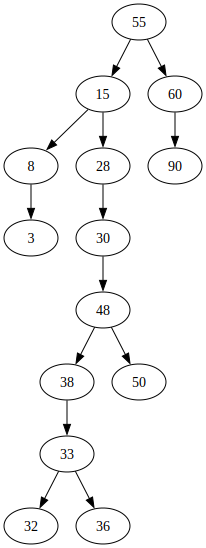

In [ ]:
bst1.delete(18)
renderBST(bst1)


30을 삭제해봅시다. (case 2)

![image.png](https://drive.google.com/uc?id=1p5-Ix-zNL7vL_qMxWS8GGCL70UFODYBk)

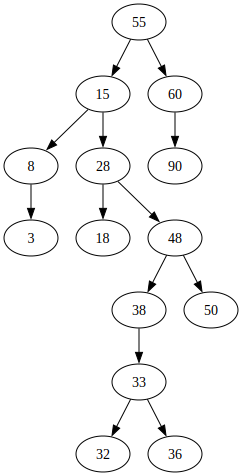

In [ ]:
#복원
bst1.insert(18)

bst1.delete(30)
renderBST(bst1)

28을 삭제해 봅시다. (Case 3)

![image-2.png](https://drive.google.com/uc?id=1n_liYiAtf0BGkh_AL0xVzEkfwm96bDHr)

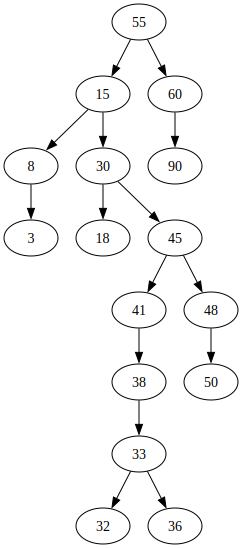

In [ ]:
#초기화
bst1.clear()

bst1.insert(55)
bst1.insert(60)
bst1.insert(90)
bst1.insert(15)
bst1.insert(8)
bst1.insert(3)
bst1.insert(28)
bst1.insert(18)
bst1.insert(45)
bst1.insert(48)
bst1.insert(50)
bst1.insert(41)
bst1.insert(30)
bst1.insert(38)
bst1.insert(33)
bst1.insert(32)
bst1.insert(36)

bst1.delete(28)
renderBST(bst1)